In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [4]:
import pandas as pd

zomato_df = pd.read_csv('C:/Users/Tanavi/OneDrive/Desktop/New folder/PROJECT/zomato.csv')


In [5]:
# Zomato Dataset
print("Zomato Data Info:")
print(zomato_df.info())
print("Zomato Data Summary:")
print(zomato_df.describe())

Zomato Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list 

In [6]:
# Handle missing values
zomato_df.dropna(inplace=True)

In [7]:
# Convert 'approx_cost(for two people)' to float (representing Price)
zomato_df['approx_cost(for two people)'] = zomato_df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Convert 'rate' to float (representing Avg ratings)
# Remove non-numeric characters if needed, assuming 'rate' might have text like "3.5/5"
zomato_df['rate'] = zomato_df['rate'].str.extract('([0-9.]+)').astype(float)

# Check the result
print(zomato_df[['approx_cost(for two people)', 'rate']].head())


   approx_cost(for two people)  rate
0                        800.0   4.1
1                        800.0   4.1
2                        800.0   3.8
3                        300.0   3.7
4                        600.0   3.8


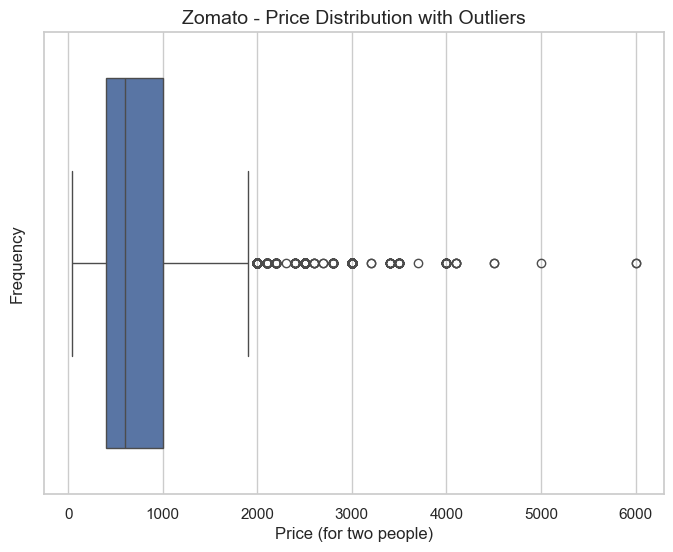

In [8]:
# Identify and handle outliers for 'Price' (approx_cost for two people)
# Create a figure with a specified size for better readability
plt.figure(figsize=(8, 6))

# Plot a boxplot to visualize the distribution of 'approx_cost(for two people)' with outliers
sns.boxplot(x=zomato_df['approx_cost(for two people)'])

# Set the title of the plot
plt.title("Zomato - Price Distribution with Outliers", fontsize=14)

# Set the x-axis label
plt.xlabel("Price (for two people)", fontsize=12)

# Set the y-axis label, though it's not commonly used in boxplots (frequency of values)
plt.ylabel("Frequency", fontsize=12)  # Frequency of price values

# Display the plot
plt.show()


In [9]:
# Average and Median for 'approx_cost(for two people)'
print("Average Price (for two people):", zomato_df['approx_cost(for two people)'].mean())
print("Median Price (for two people):", zomato_df['approx_cost(for two people)'].median())


Average Price (for two people): 755.90436769715
Median Price (for two people): 600.0


In [10]:
# Average and Median for 'rate' (Ratings)
print("Average Rating (Zomato):", zomato_df['rate'].mean())
print("Median Rating (Zomato):", zomato_df['rate'].median())


Average Rating (Zomato): 3.9043825392692875
Median Rating (Zomato): 4.0


In [11]:
# Location analysis
location_counts = zomato_df['location'].value_counts()
print("Location Distribution:\n", location_counts)


Location Distribution:
 location
Koramangala 5th Block    1783
BTM                      1456
Indiranagar              1350
HSR                      1162
Jayanagar                1037
                         ... 
Kanakapura Road             2
West Bangalore              2
Yelahanka                   2
Magadi Road                 2
KR Puram                    1
Name: count, Length: 88, dtype: int64


In [12]:
# Votes analysis
print("Total Votes:", zomato_df['votes'].sum())


Total Votes: 13940720


In [13]:
# Online Order analysis
online_order_count = zomato_df['online_order'].value_counts()
print("Online Order Distribution:\n", online_order_count)


Online Order Distribution:
 online_order
Yes    16358
No      6835
Name: count, dtype: int64


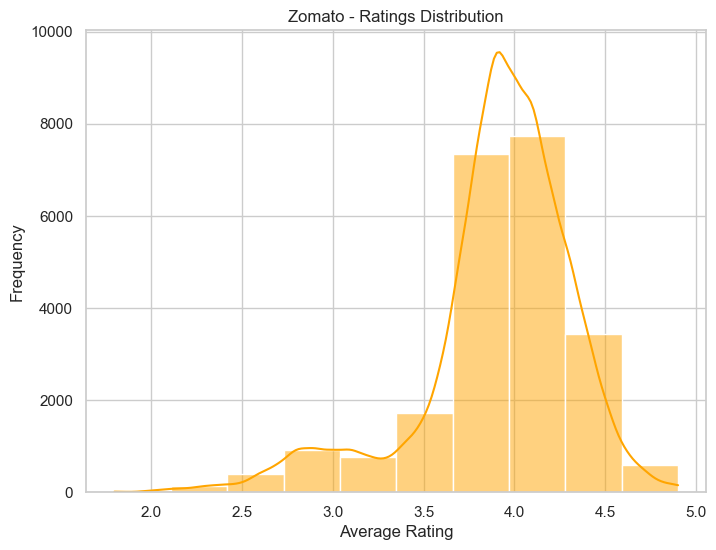

In [20]:
# Create a figure with a specified size for better readability
plt.figure(figsize=(8, 6))

# Plot a histogram with Kernel Density Estimation (KDE) to visualize the distribution of ratings
# The 'rate' column is used, with 10 bins and an orange color
sns.histplot(zomato_df['rate'], bins=10, kde=True, color="orange")

# Set the title of the plot
plt.title("Zomato - Ratings Distribution")

# Set the x-axis label for the average ratings
plt.xlabel("Average Rating")

# Set the y-axis label for frequency of ratings
plt.ylabel("Frequency")

# Display the plot
plt.show()


0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object


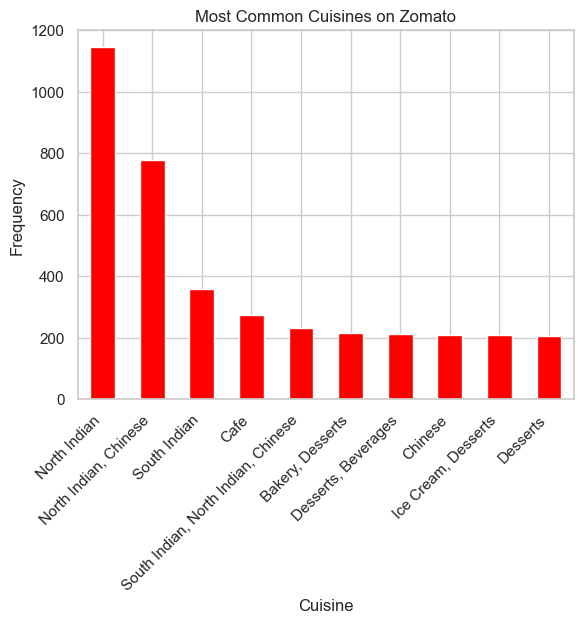

In [19]:
# First, check for the 'cuisines' column and display the first few entries to understand its structure
print(zomato_df['cuisines'].head())

# Plot the frequency of the top 10 most common cuisines in the dataset
zomato_df['cuisines'].value_counts().head(10).plot(kind='bar', color='red')

# Set the title of the bar plot
plt.title("Most Common Cuisines on Zomato")

# Set the x-axis label for cuisine names
plt.xlabel("Cuisine")

# Set the y-axis label for frequency of each cuisine
plt.ylabel("Frequency")

# Rotate x-axis labels for better visibility and alignment
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


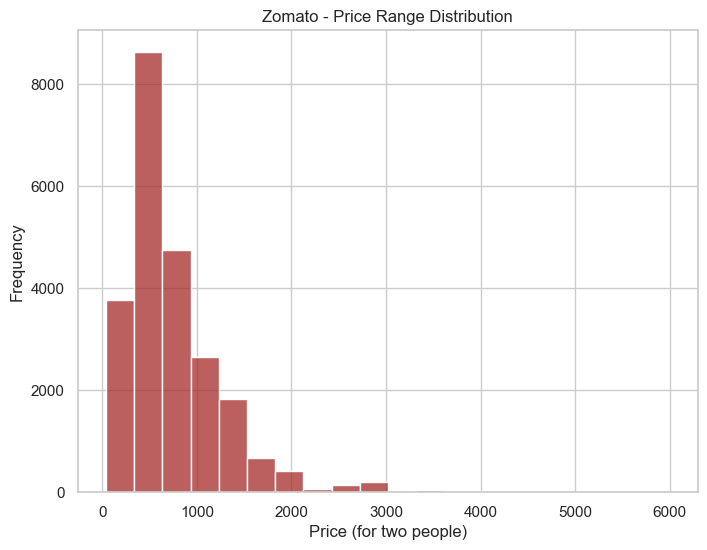

In [18]:
# Create a figure with a specified size for better readability
plt.figure(figsize=(8, 6))

# Plot a histogram to visualize the distribution of 'approx_cost(for two people)' with 20 bins and brown color
sns.histplot(zomato_df['approx_cost(for two people)'], bins=20, color='brown')

# Set the title of the plot
plt.title("Zomato - Price Range Distribution")

# Set the x-axis label for price
plt.xlabel("Price (for two people)")

# Set the y-axis label for frequency of price values
plt.ylabel("Frequency")

# Display the plot
plt.show()


In [17]:
print(zomato_df.columns)


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
